In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.preprocessing as prep
from sklearn.model_selection import train_test_split

In [22]:
data = pd.read_csv('heart.csv')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
le = prep.LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['ExerciseAngina'] = le.fit_transform(data['ExerciseAngina'])

In [25]:
y = data['HeartDisease']
db = data
del db['HeartDisease']
x = db
x = pd.get_dummies(x, drop_first=True)

In [26]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   Sex_M              918 non-null    uint8  
 7   ChestPainType_ATA  918 non-null    uint8  
 8   ChestPainType_NAP  918 non-null    uint8  
 9   ChestPainType_TA   918 non-null    uint8  
 10  RestingECG_Normal  918 non-null    uint8  
 11  RestingECG_ST      918 non-null    uint8  
 12  ExerciseAngina_Y   918 non-null    uint8  
 13  ST_Slope_Flat      918 non-null    uint8  
 14  ST_Slope_Up        918 non-null    uint8  
dtypes: float64(1), int64(5), uint8(9)
memory usage: 51.2 KB


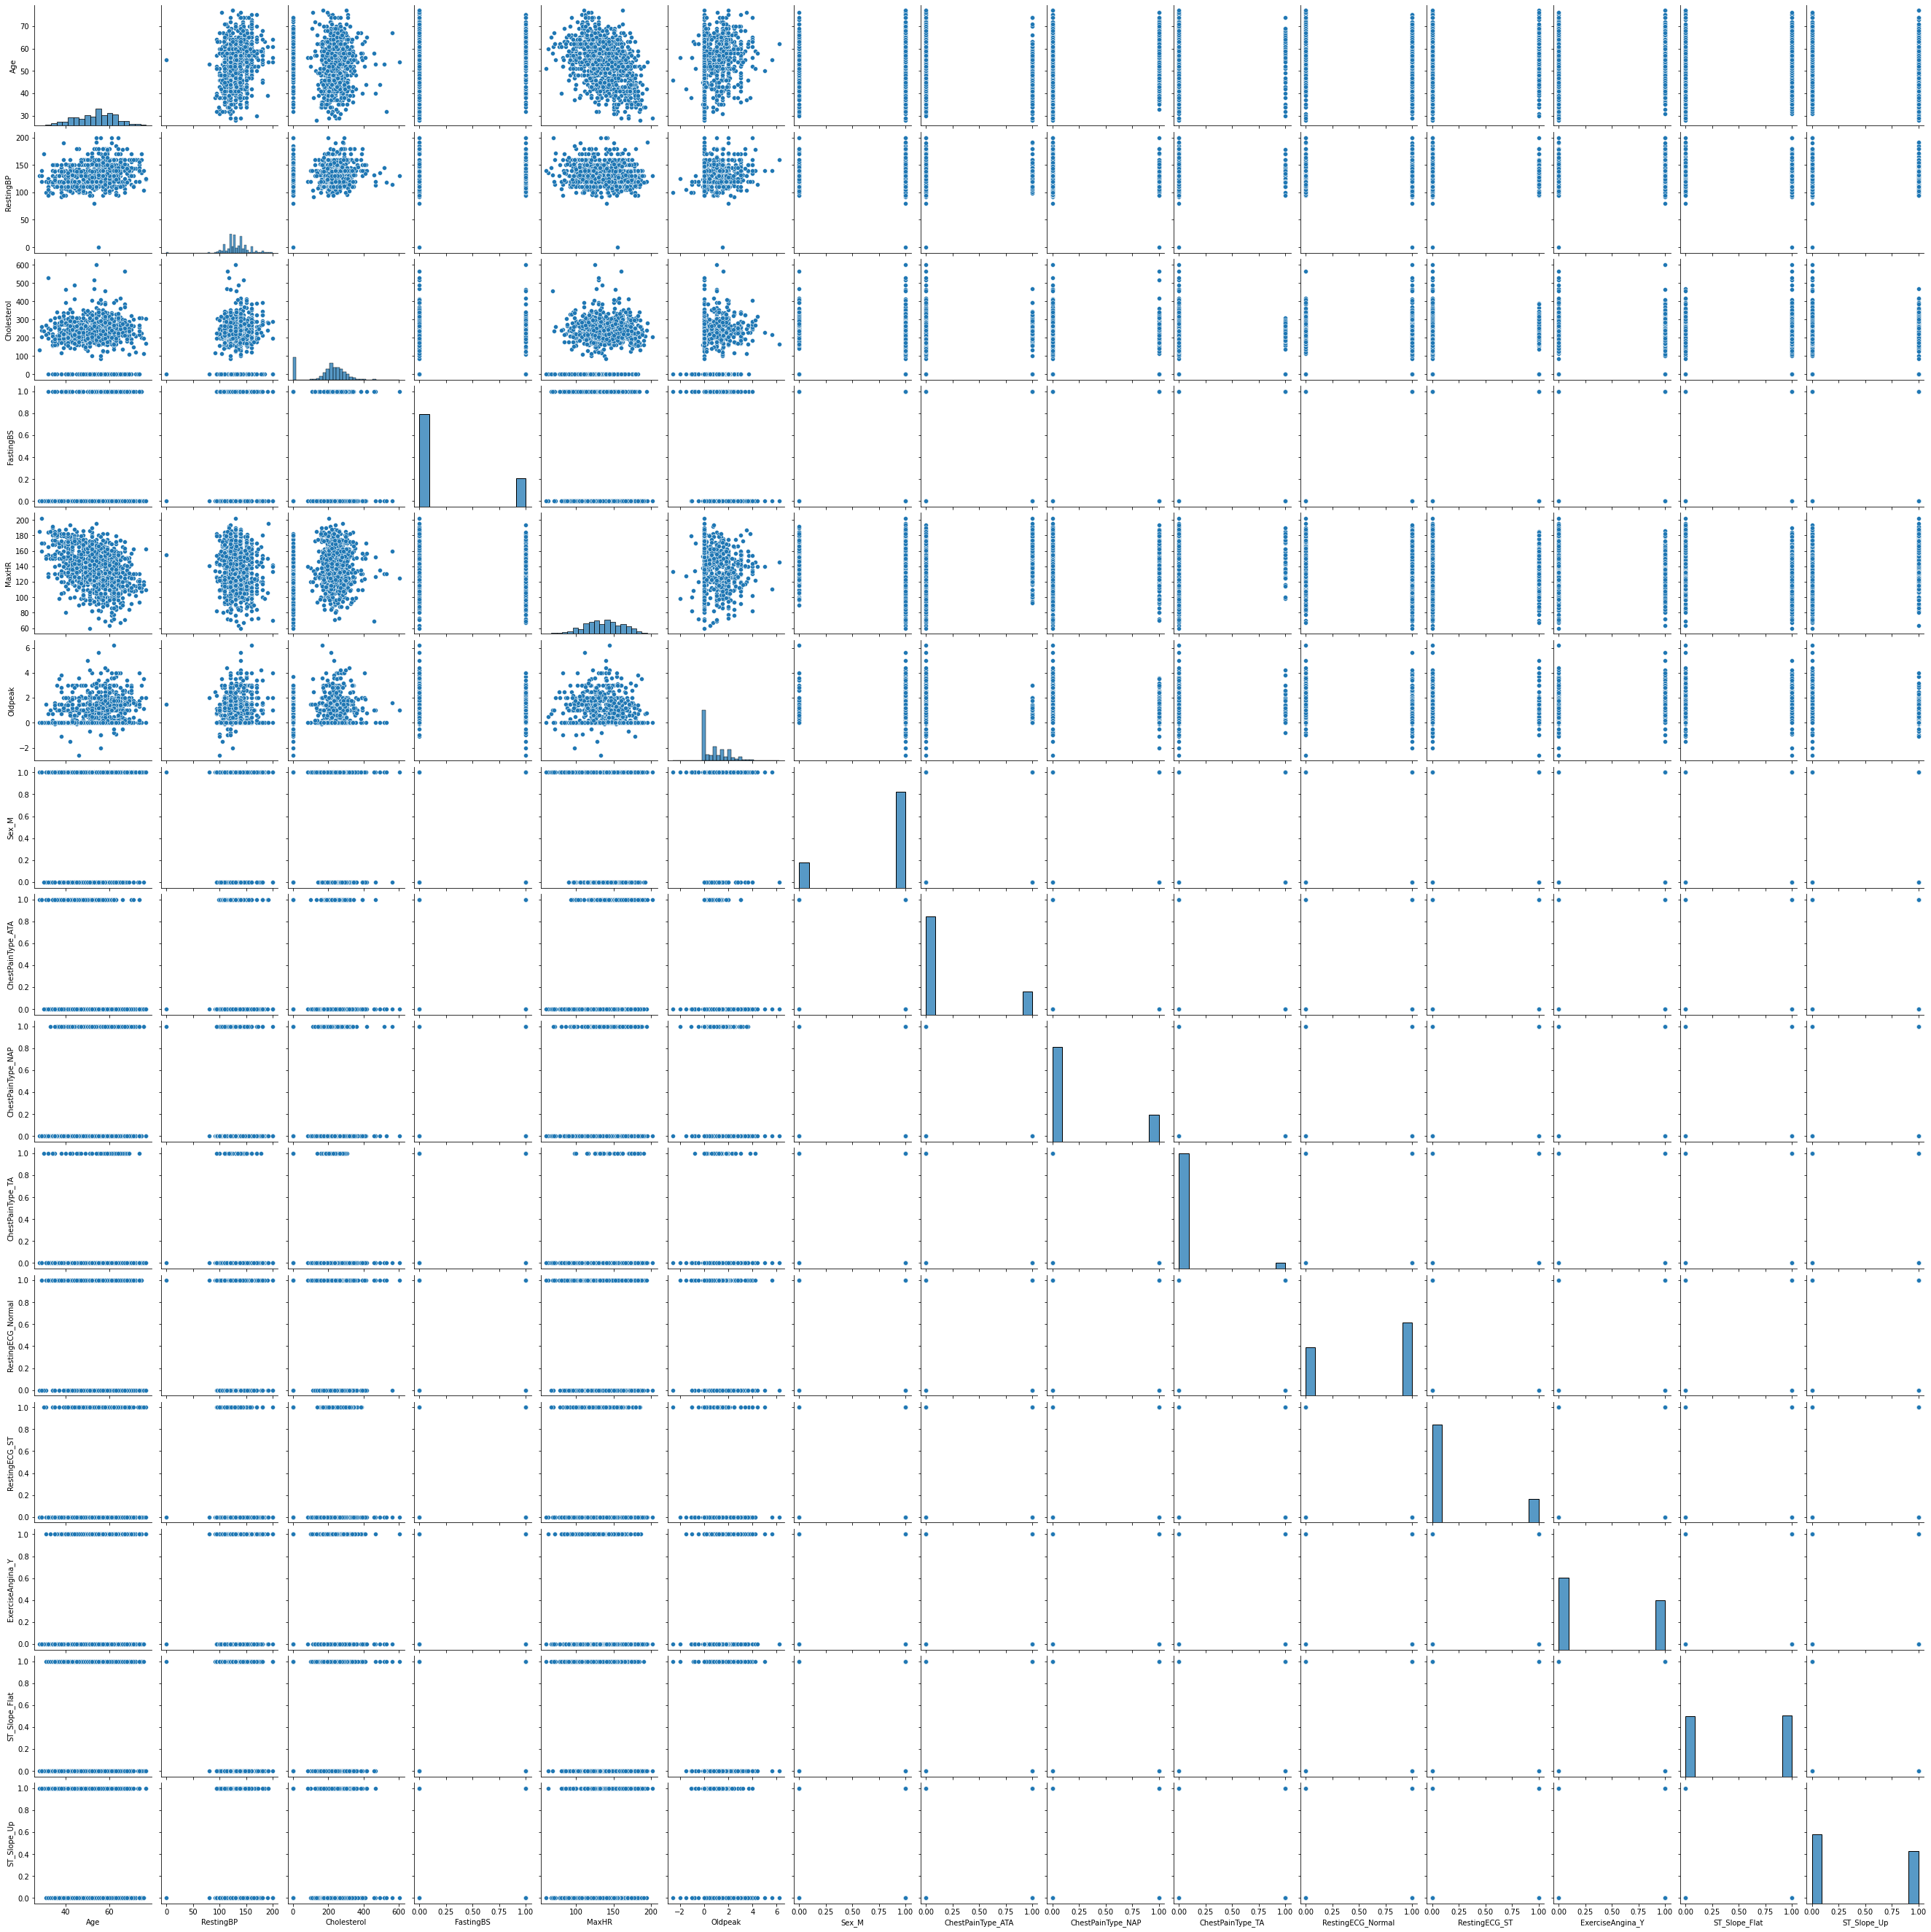

In [27]:
#Из данного графика можно заметить выбросы в признаке RestingBP
sns.pairplot(x)

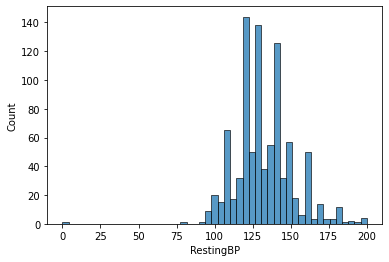

In [28]:
sns.histplot(x['RestingBP'])
#Можно заметить, что показатель артериального кровяного давления равен 0, возможно сбой аппаратуры

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model_1 = DecisionTreeClassifier(random_state=42)
model_2 = RandomForestClassifier(random_state=42)

In [32]:
model_1.fit(x_train, y_train)
model_2.fit(x_train, y_train)
y_pred_1 = model_1.predict(x_test)
y_pred_2 = model_2.predict(x_test)

In [39]:
import sklearn.metrics as m

print(m.classification_report(y_test, y_pred_1))
print(m.classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79        77
           1       0.86      0.84      0.85       107

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



In [43]:
pd.DataFrame({'features' : x.columns, 'importance' : model_1.feature_importances_})

,features,importance
0,Age,0.088398
1,RestingBP,0.052182
2,Cholesterol,0.101571
3,FastingBS,0.028817
4,MaxHR,0.113995
5,Oldpeak,0.069489
6,Sex_M,0.045519
7,ChestPainType_ATA,0.014363
8,ChestPainType_NAP,0.016927
9,ChestPainType_TA,0.000000


In [59]:
from sklearn.ensemble import BaggingClassifier

model_3 = BaggingClassifier(model_1,
                           n_estimators=100,
                           max_samples=0.85,
                           max_features=0.85,
                           random_state=42)
model_3.fit(x_train, y_train)
y_pred_3 = model_3.predict(x_test)
print(m.classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86        77
           1       0.90      0.91      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



In [64]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC

model_4 = StackingClassifier(
    [('DecitionTree', model_1),
     ('RandomForest', model_2),
     ('LinearSVC', LinearSVC())]
)
model_4.fit(x_train, y_train)
y_pred_4 = model_4.predict(x_test)
print(m.classification_report(y_test, y_pred_4))

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Из всех моделей самую лучшую метрику показала модель бэггинга на основе дерева решений.

Я считаю, что в данном случае лучшими моделями являются бэггинг и случайный лес.
Так как модель дерева решений очень хорошо подходит для ансамблирования, именно бэггинг показал самый высокий результат (были заданы начальные параметры), случайный лес работатает на основе бэггинга, но начальные параметры не были заданы, поэтому результат несколько хуже.

Модель дерева решений справилась хуже потому, что имеет довольно большую вариативность.

А в стекинге присутствует линейная модель, которая, возможно, не совсем подходит для нашей задачи.